In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pylab as pl
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
def generate_training_testing_set(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    x_train = x_train.T
    x_test = x_test.T
    y_train = y_train.T
    y_test = y_test.T
    return x_train, x_test, y_train, y_test

In [5]:
def sigmoid(y):
    s = 1.0 / (1.0 + np.exp(-y))
    return s

In [6]:
def logLoss(y_true, y_pred, eps=1e-15):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert (len(y_true) and len(y_true) == len(y_pred))
    p = np.clip(y_pred, eps, 1 - eps)
    loss = np.sum(- y_true * np.log(p) - (1 - y_true) * np.log(1 - p))
    loss = loss / len(y_true)
#     print("loss is", loss)
    return loss

In [7]:
def cost(xMat, weights, w0, yMat):
    hypothesis = sigmoid(np.dot(xMat, weights) + w0)  #predicted_y
    cs2 = logLoss(yMat, hypothesis) # calculate cost by using log loss
    return cs2

In [8]:
def linear_regression_model(x, y_true, maxEpochs=10000, lr=0.1, lamb=1, penalty='L1'):
    # initialize parameters
    # w, w0 = initialize_parameter(x)
    l_list = []
    epochCount = 0
    xMat = np.mat(x).T
    yMat = np.mat(y_true).T
    m, n = xMat.shape
    
    #initialize parameter
    weight = np.ones((n, 1))
    best_weight = None
    best_w0 = None
    w0 = 0
    epochList = []
    for i in range(maxEpochs):
        loss = cost(xMat, weight, w0, yMat)  # calculate the loss last time
        y_pred = sigmoid(np.dot(xMat, weight) + w0)  
        error = y_pred - yMat  # error
        grad = (1.0 / m) * np.dot(xMat.T, error) # gradient
        if penalty == 'L2':
            grad = grad + lamb *weight
        elif penalty == 'L1':
            grad = grad + lamb * np.sign(weight)
            
        # update parameter
        w0 = (1.0 / m) * np.sum(error) 
        weight = weight - lr * grad  
        loss_new = cost(xMat, weight, w0,  yMat)  # calculate current loss
        if loss_new < loss:
            best_weight = weight
            best_w0 = w0
        epochCount += 1
        l_list.append(loss_new)
        epochList.append(epochCount)


    plt.plot(epochList, l_list)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
#     print("best weight: ", best_weight)
#     print("best w0 :", best_w0)

    return l_list, best_weight, best_w0

In [9]:
def draw_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC (area = {0:.2f})'.format(roc_auc),color='#9900F0')
    plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    plt.ylim([-0.05, 1.05])
    plt.plot([0, 1], [0, 1], 'r--',label='random guess',color='#FF85B3')
    plt.fill_between(fpr,tpr,y2=0,facecolor='#FFEEEE')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('roc.png', dpi = 300)
    plt.show()
    

In [10]:
def draw_tpr_1_fpr(fpr, tpr):
    fig, ax = pl.subplots()
    pl.plot(roc['tpr'])
    pl.plot(roc['1-fpr'], color = 'red')
    pl.xlabel('1-False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic')
    ax.set_xticklabels([])

In [11]:
data = pd.read_csv("log2_Normalized_DEG_p0.001_FC2.csv")
print("original data type:", data.shape) #（809，798） 808 genes, 797samples.

# remove gene name
data_without_geneName = data.drop(["geneName"], axis=1)
data_without_geneName.head(10)
print("shape of data_without_geneName", data_without_geneName.shape)

# transpose
data_transpose = data_without_geneName.T
# data_transpose.head(10)
print("shape of data_transpose", data_transpose.shape)

# get label y:
y_pre = data_transpose[0]
y = y_pre.values
print("shape of y", y.shape)

# get x
x = data_transpose.drop([0], axis=1)
print("shape of x", x.shape)
x.head(10)

x_train, x_test, y_train, y_test = generate_training_testing_set(x, y)
print("shape of x_train", x_train.shape)
print("shape of y_train", y_train.shape)

data.head(10)

original data type: (809, 798)
shape of data_without_geneName (809, 797)
shape of data_transpose (797, 809)
shape of y (797,)
shape of x (797, 808)
shape of x_train (808, 637)
shape of y_train (637,)


,geneName,TCGA-A2-A0EM-01A-11R-A034-07,TCGA-A2-A0T6-01A-11R-A084-07,TCGA-BH-A0B7-01A-12R-A115-07,TCGA-E2-A15E-06A-11R-A12D-07,TCGA-EW-A1P4-01A-21R-A144-07,TCGA-E2-A3DX-01A-21R-A213-07,TCGA-E2-A153-01A-12R-A12D-07,TCGA-E2-A14Q-01A-11R-A12D-07,TCGA-A2-A0CZ-01A-11R-A034-07,...,TCGA-BH-A0AY-11A-23R-A089-07,TCGA-BH-A0DZ-11A-22R-A089-07,TCGA-E9-A1R7-11A-42R-A14M-07,TCGA-A7-A13G-11A-51R-A13Q-07,TCGA-A7-A0D9-11A-53R-A089-07,TCGA-BH-A0C3-11A-23R-A12P-07,TCGA-BH-A0H5-11A-62R-A115-07,TCGA-AC-A23H-11A-12R-A157-07,TCGA-BH-A1F2-11A-32R-A13Q-07,TCGA-A7-A0DC-11A-41R-A089-07
0,Disease_state,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000002726.18,0.370249,1.365058,1.775361,1.296699,1.717995,0.318669,0.377462,0.214963,0.644008,...,0.239368,1.042361,0.399763,0.025890,1.009970,0.396546,0.481502,0.425767,0.356691,0.353923
2,ENSG00000004838.12,4.770693,4.030199,3.727517,3.232234,1.238163,3.955585,4.509768,5.647388,0.587249,...,2.725260,3.429190,0.696746,0.520637,0.710716,2.266653,1.795877,0.990555,1.118175,1.606685
3,ENSG00000007968.6,2.383093,1.125585,3.341985,2.179594,5.156368,1.846146,0.961257,2.594389,1.167293,...,1.310282,2.415891,0.929533,0.445893,0.534051,2.622123,1.140410,1.339415,1.166003,1.383280
4,ENSG00000008056.11,0.616848,0.930642,0.805799,0.406653,0.818248,1.069411,1.456535,0.636968,1.489832,...,0.768803,0.942788,0.632167,0.770792,0.332693,0.903016,0.513887,0.882771,0.708532,0.921185
5,ENSG00000008300.13,2.269243,4.625119,4.266596,2.112571,4.399544,2.544419,4.387980,2.590896,2.206995,...,1.958884,3.042743,1.595590,1.424401,1.076000,2.313313,2.310911,1.537237,1.724589,1.662055
6,ENSG00000008735.13,3.156520,1.116876,4.012673,3.952419,2.071070,3.804975,4.582100,4.345166,4.285967,...,2.656722,3.620861,1.284995,1.490973,0.975786,2.106311,3.160239,1.905464,2.582017,3.208147
7,ENSG00000010030.12,2.058907,2.002623,2.372862,1.562493,4.041772,2.288716,2.475236,2.199520,2.075609,...,1.542526,1.828175,0.956158,0.786023,0.791547,1.411889,1.240568,1.449291,1.307777,1.092196
8,ENSG00000011426.9,4.197554,3.239402,5.939832,3.976178,7.880999,4.221847,4.379369,4.915029,3.072982,...,1.925002,3.014996,1.770798,0.943734,2.039961,2.538182,1.885237,1.948871,1.851893,2.445858
9,ENSG00000013588.5,7.331730,6.356620,7.348432,7.486745,8.723849,7.474685,9.183424,7.801142,8.242934,...,5.513673,8.601471,4.609679,5.521795,5.429193,5.073789,5.699516,5.947639,6.681355,7.241604


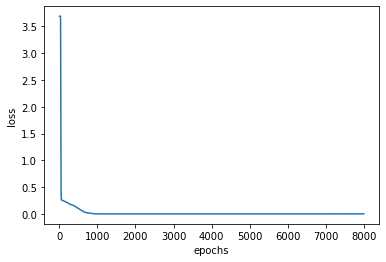

correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[0.00332731]]
correct [[1.]] predict [[0.99999998]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[0.99999999]]
correct [[1.]] predict [[0.99999761]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[0.99976504]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[3.45613919e-06]]
correct [[1.]] predict [[0.99999999]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[0.]] predict [[0.00019728]]
correct [[1.]] predict [[0.99999998]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[1.]] predict [[1.]]
correct [[0.]] predict [[8.35255528e-07]]
correct [[1.]] predict [[1.]]
correct [[1.

In [12]:
l_list, w, w0 = linear_regression_model(x_train, y_train, 8000, penalty='L1', lamb=0.001)
xMat = np.mat(x_test).T
yMat = np.mat(y_test).T
y_pred = sigmoid(np.dot(xMat, w) + w0)
count = 0
for i in range(160):
    print("correct %s predict %s" % (yMat[i],y_pred[i]))
    if y_pred[i] >0.5:
        y_predict_round = 1
    else:
        y_predict_round = 0
    if yMat[i] == y_predict_round:
        count += 1
print("accuracy:", count/160)
# print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(yMat,y_pred))
# print("accuracy: ", accuracy_score(yMat, y_pred))

In [15]:
def plot_w(w,x=[]):
    print(w.shape)
    print(len(w))
    y = w.tolist()
    print(len(y))
    if len(x) == 0:
#         x = range(1,len(w)+1)
        x = range(len(w))
    plt.xlabel('Gene Index')
    plt.ylabel('Coefficient')
    plt.scatter(x,y,s=1)
    plt.savefig("coefficient.png",dpi=500)
    plt.show()

In [17]:
# plot_w(w,x=[])

In [18]:
print(yMat.shape)

(160, 1)


In [19]:
for weight in w:
    if weight == 0:
        print(weight)

In [20]:
fpr, tpr, thresholds = roc_curve(yMat, y_pred)
print("fpr is: ", fpr)
print("tpr is: ", tpr)
for i, value in enumerate(thresholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))

fpr is:  [0.         0.         0.         0.         0.14285714 0.14285714
 0.76190476 0.76190476 1.        ]
tpr is:  [0.         0.02158273 0.09352518 0.98561151 0.98561151 0.99280576
 0.99280576 1.         1.        ]
0.000000 0.000000 2.000000
0.000000 0.021583 1.000000
0.000000 0.093525 1.000000
0.000000 0.985612 0.612718
0.142857 0.985612 0.004005
0.142857 0.992806 0.003327
0.761905 0.992806 0.000004
0.761905 1.000000 0.000003
1.000000 1.000000 0.000000


In [21]:
roc_auc = auc(fpr, tpr)

/var/folders/75/w279mw753zx0klw_8d8t5cg40000gn/T/ipykernel_94576/3554460110.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--',label='random guess',color='#FF85B3')


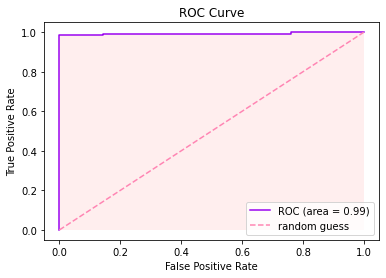

In [22]:
draw_roc_curve(fpr, tpr)

In [23]:
def draw_tpr_1_fpr(fpr, tpr):
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    print(roc)
    # Plot tpr vs 1-fpr
    fig, ax = pl.subplots()
#     fig = plt.figure(figsize=(10.20,5.80))
    pl.plot(roc['tpr'],label='true positive rate',color='#9900F0')
    pl.plot(roc['1-fpr'], color ='#FF85B3', label='1 - false positive rate')
    pl.xlabel('1-False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title('Receiver operating characteristic')
    pl.legend()
    plt.savefig('tprfpr.png', dpi = 300)
    
    ax.set_xticklabels([])

        fpr       tpr     1-fpr        tf    thresholds
0  0.000000  0.000000  1.000000 -1.000000  2.000000e+00
1  0.000000  0.021583  1.000000 -0.978417  1.000000e+00
2  0.000000  0.093525  1.000000 -0.906475  1.000000e+00
3  0.000000  0.985612  1.000000 -0.014388  6.127177e-01
4  0.142857  0.985612  0.857143  0.128469  4.004885e-03
5  0.142857  0.992806  0.857143  0.135663  3.327310e-03
6  0.761905  0.992806  0.238095  0.754711  4.460223e-06
7  0.761905  1.000000  0.238095  0.761905  3.456139e-06
8  1.000000  1.000000  0.000000  1.000000  3.509656e-09


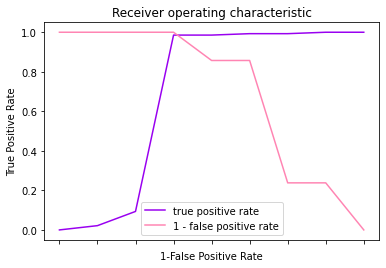

In [24]:
draw_tpr_1_fpr(fpr, tpr)

In [25]:
#get the index of the 
w_line = w.T
print(w_line.shape)
order = w_line.argsort()
# print(temp.shape)
ranks = order.argsort()


idx_list = []
for rank in range(788,808):
# for rank in range(4479,4509):
    for idx in range(808):
        if ranks.T[idx] == rank:
            idx_list.append(idx)
            print("weigt %s: %s; rank: %s" % (idx, w[idx], ranks.T[idx]))
print(idx_list)

(1, 808)
weigt 453: [[0.27065024]]; rank: [[788]]
weigt 357: [[0.27175862]]; rank: [[789]]
weigt 545: [[0.27574646]]; rank: [[790]]
weigt 399: [[0.27696207]]; rank: [[791]]
weigt 609: [[0.28862112]]; rank: [[792]]
weigt 759: [[0.29354227]]; rank: [[793]]
weigt 181: [[0.29406843]]; rank: [[794]]
weigt 396: [[0.2969264]]; rank: [[795]]
weigt 765: [[0.30323989]]; rank: [[796]]
weigt 206: [[0.30526338]]; rank: [[797]]
weigt 74: [[0.31894455]]; rank: [[798]]
weigt 298: [[0.32282714]]; rank: [[799]]
weigt 454: [[0.35264434]]; rank: [[800]]
weigt 342: [[0.35296688]]; rank: [[801]]
weigt 518: [[0.36852547]]; rank: [[802]]
weigt 393: [[0.36984796]]; rank: [[803]]
weigt 703: [[0.38594344]]; rank: [[804]]
weigt 685: [[0.44248071]]; rank: [[805]]
weigt 675: [[0.50144938]]; rank: [[806]]
weigt 191: [[0.60715111]]; rank: [[807]]
[453, 357, 545, 399, 609, 759, 181, 396, 765, 206, 74, 298, 454, 342, 518, 393, 703, 685, 675, 191]


In [26]:
#extract top 20 genes

print(len(idx_list))
gene_name_list = list(data['geneName'])
gene_name_list = gene_name_list[1:]
# print(gene_name_list)
top_20_gene_list = []
for idx in idx_list:
    top_20_gene_list.append(gene_name_list[idx])
for gene in top_20_gene_list:
    print(gene)

20
ENSG00000170369.3
ENSG00000159212.11
ENSG00000183813.6
ENSG00000165061.13
ENSG00000197753.8
ENSG00000261742.4
ENSG00000122584.11
ENSG00000164756.11
ENSG00000264589.1
ENSG00000125869.8
ENSG00000100362.11
ENSG00000144045.12
ENSG00000170373.7
ENSG00000155886.10
ENSG00000179546.4
ENSG00000164287.11
ENSG00000235978.5
ENSG00000231574.4
ENSG00000228221.4
ENSG00000123500.8


In [27]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.6127176937805122


In [32]:
# weight_larger_than_1 = []
# for weight in w:
#     if weight > 0:
#         weight_larger_than_1.append(weight)
# print(len(weight_larger_than_1))

In [33]:
# gene_name_list_larger_1 = []
# for idx in idx_list_larger_1:
#     gene_name_list_larger_1.append(gene_name_list[idx])
# for gene in gene_name_list_larger_1:
#     print(gene)

In [38]:
# from sklearn.linear_model import LogisticRegression
# lr_package = LogisticRegression(C=1,penalty="l1",max_iter=10000,solver='liblinear')
# clf_l1_LR = lr_package.fit(np.mat(x_train).T,np.mat(y_train).T)
# coef_l1_LR = clf_l1_LR.coef_.ravel()
# print("Test Accuracy {}".format(lr_package.score(x_test.T,y_test.T)))

In [39]:
# for coef in coef_l1_LR:
#     print(coef)

In [40]:
# print(np.mat(x_train).T.shape[0])

In [41]:
def draw_confusion_matrix(fig_idx,y_pred,yMat):
    print("y_pred.shape\n",y_pred.shape)
    print("yMat.shape\n",yMat.shape)
    y_pred_list = []
    yMat_list =[]
    for i in range(y_pred.shape[0]):
#             print("%s: y_pred: %s, y_test: %s" %(i, y_pred[i], yMat[i]))
            if y_pred[i] >0.5:
                y_pred_list.append(1) 
            else:
                y_pred_list.append(0) 
            yMat_list.append(int(yMat[i]))
    print("y_pred_list", len(y_pred_list))
    print("yMat_list", len(yMat_list))
    confusionMatrix = confusion_matrix(yMat_list,y_pred_list)
    print("confusionMatrix\n",confusionMatrix)
    print("confusionMatrix shape", confusionMatrix.shape)
    
    TN = confusionMatrix[0][0]
    TP = confusionMatrix[1][1]
    FP = confusionMatrix[0][1]
    FN = confusionMatrix[1][0]
    print(TN,TP,FP,FN)

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    print("precision", precision)
    print("recall", recall)
    print("F1", F1)
    
    plt.figure(figsize=(8,8))
    ax = sns.heatmap(confusionMatrix, annot=True, cmap='Reds',fmt='g')
    plt.title('confusion matrix')
    figname = 'confusion_matrix'+str(fig_idx)+'.png'
    plt.savefig(figname,dpi=500)
    plt.show()

In [42]:
#5-fold cross validation
def five_fold_cross_validation(X, Y):
    plt.figure()
    tprs=[]
    aucs=[]
    mean_fpr=np.linspace(0,1,100)
    fig_idx=0
    KF=KFold(n_splits=5,random_state=42,shuffle=True)
    plt.figure()
    fig_info = []#a list of list, [fpr,tpr,roc_auc]
#     KF=KFold(n_splits=5)
    for train_index,test_index in KF.split(X):
#         print("train_index", train_index)
#         print("test_index", test_index)
#         print("x[0]\n", X[0])
        accuracy = 0
        count = 0
        print("fig_idx\n", fig_idx)
        
        X_train,X_test=X[train_index].T,X[test_index].T
        print("X_train shape", X_train.shape)
        print("X_test shape", X_test.shape)
        Y_train,Y_test=Y[train_index],Y[test_index]
        print("Y_train shape", Y_train.shape)
        print("Y_test shape", Y_test.shape)
        _, w, w0 = linear_regression_model(X_train, Y_train, 2000, penalty='L2', lamb=0.001)
        
        y_pred = sigmoid(np.dot(np.mat(X_test).T, w) + w0)
        yMat = np.mat(Y_test).T
        draw_confusion_matrix(fig_idx,y_pred,yMat)
#         print("y_pred.shape[0]", y_pred.shape[0])
        for i in range(y_pred.shape[0]):
#             print("%s: y_pred: %s, y_test: %s" %(i, y_pred[i], yMat[i]))
            if y_pred[i] >0.5:
                y_predict_round = 1
            else:
                y_predict_round = 0
            if yMat[i] == y_predict_round:
                count += 1
        print("accuracy:", count/y_pred.shape[0])
        
        
        accuracy = count/y_pred.shape[0]
        
#         fpr,tpr,thresholds=roc_curve(Y_test[:,1],y_pred[:,1])
        fpr,tpr,thresholds=roc_curve(yMat,y_pred)
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        
        #calculate auc
        roc_auc=auc(fpr,tpr)
        print("roc_auc\n", roc_auc)
        aucs.append(roc_auc)
        curr_info = [fpr,tpr,roc_auc]
        fig_info.append(curr_info)
        #draw roc curve
#         plt.plot(fpr,tpr,lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (fig_idx,roc_auc)) 
        fig_idx +=1

    plt.plot(fig_info[0][0],fig_info[0][1],lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (1,fig_info[0][2]))
    plt.plot(fig_info[1][0],fig_info[1][1],lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (2,fig_info[1][2]))
    plt.plot(fig_info[2][0],fig_info[2][1],lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (3,fig_info[2][2]))
    plt.plot(fig_info[3][0],fig_info[3][1],lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (4,fig_info[3][2]))
    plt.plot(fig_info[4][0],fig_info[4][1],lw=1,alpha=0.3,label='ROC fold %d(area=%0.2f)'% (5,fig_info[4][2]))
    
    plt.plot([0,1],[0,1],linestyle='--',lw=2,color='r',label='Luck',alpha=.8)
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#calculate average
    std_auc=np.std(tprs,axis=0)
    plt.plot(mean_fpr,mean_tpr,color='b',label=r'Mean ROC (area=%0.2f)'%mean_auc,lw=2,alpha=.8)
    std_tpr=np.std(tprs,axis=0)
    tprs_upper=np.minimum(mean_tpr+std_tpr,1)
    tprs_lower=np.maximum(mean_tpr-std_tpr,0)
    plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2,label=r'$\pm$ 1 std. dev.')
    plt.legend(loc='lower right',fontsize='x-small')
    plt.savefig('roc_5_fold.png', dpi = 600)
    plt.show()   

fig_idx
 0
X_train shape (808, 637)
X_test shape (808, 160)
Y_train shape (637,)
Y_test shape (160,)


<Figure size 432x288 with 0 Axes>

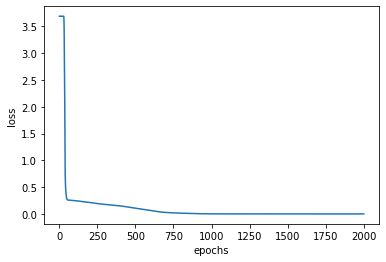

y_pred.shape
 (160, 1)
yMat.shape
 (160, 1)
y_pred_list 160
yMat_list 160
confusionMatrix
 [[ 20   1]
 [  2 137]]
confusionMatrix shape (2, 2)
20 137 1 2
precision 0.9927536231884058
recall 0.9856115107913669
F1 0.9891696750902527


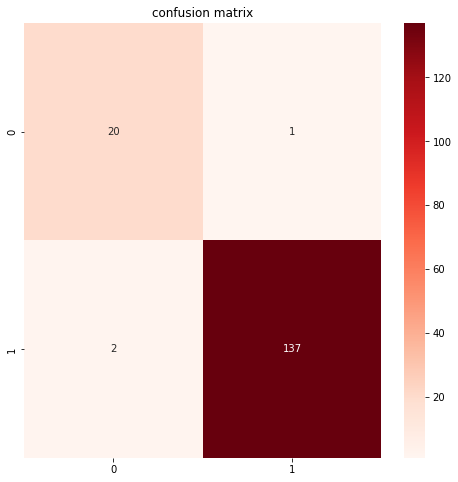

accuracy: 0.98125
roc_auc
 0.9907502569373073
fig_idx
 1
X_train shape (808, 637)
X_test shape (808, 160)
Y_train shape (637,)
Y_test shape (160,)


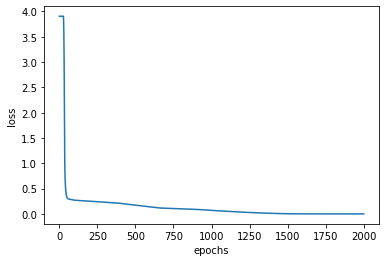

y_pred.shape
 (160, 1)
yMat.shape
 (160, 1)
y_pred_list 160
yMat_list 160
confusionMatrix
 [[ 17   0]
 [  1 142]]
confusionMatrix shape (2, 2)
17 142 0 1
precision 1.0
recall 0.993006993006993
F1 0.9964912280701755


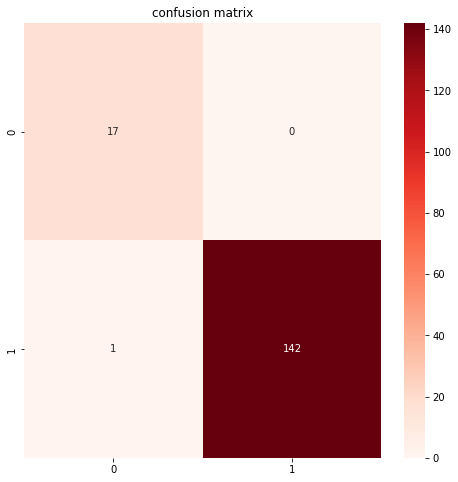

accuracy: 0.99375
roc_auc
 0.9995886466474702
fig_idx
 2
X_train shape (808, 638)
X_test shape (808, 159)
Y_train shape (638,)
Y_test shape (159,)


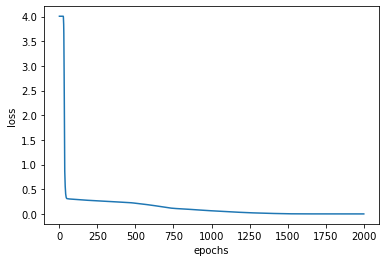

y_pred.shape
 (159, 1)
yMat.shape
 (159, 1)
y_pred_list 159
yMat_list 159
confusionMatrix
 [[ 14   1]
 [  1 143]]
confusionMatrix shape (2, 2)
14 143 1 1
precision 0.9930555555555556
recall 0.9930555555555556
F1 0.9930555555555556


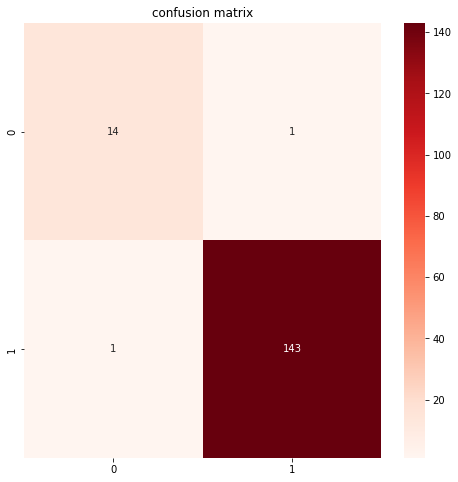

accuracy: 0.9874213836477987
roc_auc
 0.9990740740740741
fig_idx
 3
X_train shape (808, 638)
X_test shape (808, 159)
Y_train shape (638,)
Y_test shape (159,)


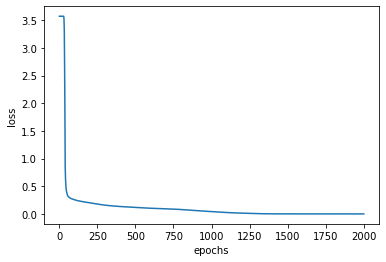

y_pred.shape
 (159, 1)
yMat.shape
 (159, 1)
y_pred_list 159
yMat_list 159
confusionMatrix
 [[ 17   6]
 [  0 136]]
confusionMatrix shape (2, 2)
17 136 6 0
precision 0.9577464788732394
recall 1.0
F1 0.9784172661870503


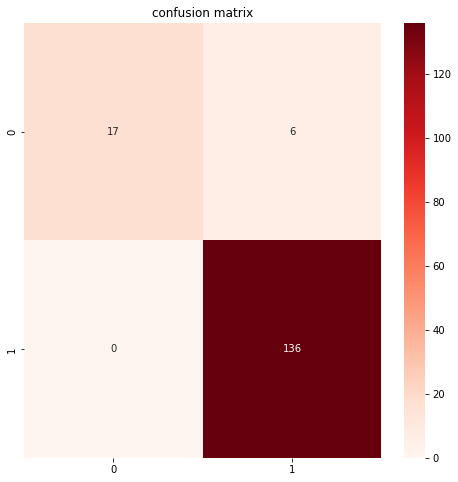

accuracy: 0.9622641509433962
roc_auc
 0.9565217391304348
fig_idx
 4
X_train shape (808, 638)
X_test shape (808, 159)
Y_train shape (638,)
Y_test shape (159,)


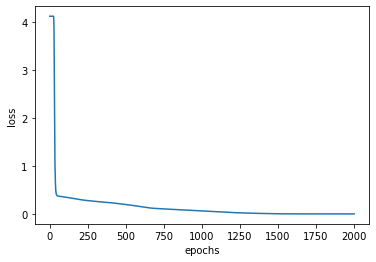

y_pred.shape
 (159, 1)
yMat.shape
 (159, 1)
y_pred_list 159
yMat_list 159
confusionMatrix
 [[ 13   0]
 [  0 146]]
confusionMatrix shape (2, 2)
13 146 0 0
precision 1.0
recall 1.0
F1 1.0


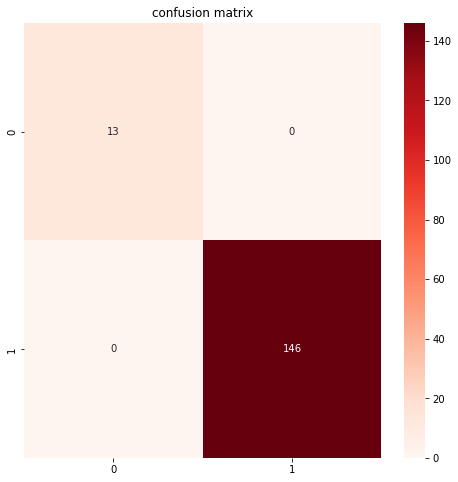

accuracy: 1.0
roc_auc
 1.0


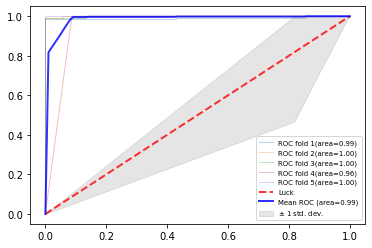

In [43]:
# five_fold_cross_validation(x, y)
five_fold_cross_validation(np.array(x), np.array(y))